In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
# Load the OCR dataset
# The MNIST dataset is a built-in dataset provided by Keras.
# It consists of 70,800 28x28 grayscale images, each of which displays a single handwritten digit from @ to 9.
# The training set consists of 60,000 images, while the test set has 108,000 images.

     

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# X_traln and X_test are our array of images while y_train and y_test are our array of labels for each image.
# The first tuple contains the training set features (X_ train) and the training set labels (y train).

# The second tuple contains the testing set features (X_ test) and the testing set labels (y_test).

# For example, if the image shows a handwritten 7, then the label will be the intger 7.

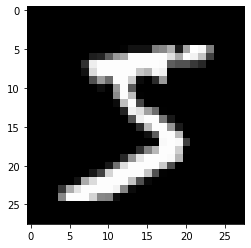

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
plt.imshow(x_train[0], cmap='gray') # lmshow() function which simply displays an image.
plt.show() # cmap is responsible for mapping a specific colormap to the values found in the array that you passed as the first argument.
# image appears black and white and that each axis of the plot ranges from @ to 28.
# This is because of the format that all the images in the dataset have:
# 1. All the images are grayscale, meaning they only contain black, white and grey.
# 2. The images are 28 pixels by 25 pixels in size (28x28).
print(x_train[0])
# image data is just an array of digits. You can almost make out a 5 from the pattern of the digits in the array.
# Array of 28 values
# a grayscale pixel is stored as a digit between © and 255 where © is black, 255 is white and values in between are different shades of g
# Therefore, each value in the [28][28] array tells the computer which color to put in that position when we display the actual image.

In [6]:
# reformat our X_train array and our X_test array because they do not have the correct shape.
# Reshape the data to fit the model
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
# Here you can see that for the training sets we have 60,800 elements and the testing sets have 18,000 elements.
# y_ train and y_test only have 1 dimensional shapes because they are just the labels of each element.
# x_train and x_test have 3 dimensional shapes because they have a width and height (28x28 pixels) for each element.
# (60000, 28, 28) 1st parameter in the tuple shows us how much image we have 2nd and 3rd parameters are the pixel values from x to y (28x
# The pixel value varies between @ to 255.
# (60000,) Training labels with integers from ©-9 with dtype of uint8. It has the shape (60009,).
# (10000, 28, 28) Testing data that consists of grayscale images. It has the shape (10000, 28, 28) and the dtype of uintB. The pixel vali
# (10e0@,) Testing labels that consist of integers from ©-9 with dtype uint8. It has the shape (10000).
     

# X: Training data of shape (n_samples, n_features)
# y: Training label values of shape (n_samples, n_labels)
# 2D array of height and width, 28 pixels by 28 pixels will just become 784 pixels (28 squared).
# Remember that X_ train has 60,000 elemenets, each with 784 total pixels so will become shape (60208, 784).
# Whereas X_test has 10,000 elements, each with each with 784 total pixels so will become shape (10800, 784).

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # use 32-bit precision when training a neural network, so at one point the training data will have tc
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from @ to 255
x_test /= 255

In [9]:
# Regarding the division by 255, this is the maximum value of a byte (the input feature's type before the conversion to float32),
# so this will ensure that the input features are scaled between ©.8 and 1.8.
# USING svm-https://mgta.gmu.edu/courses/ml-with-python/handwrittenDigitRecognition.phpi:~:text=Remember¥%20that¥%20X_train¥%2@has%2068%2c0¢
# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test] # f your particular categories is present then it mark as 1 else @ in remain row
     

In [10]:
# Define the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # The input_shape argument is passed to the foremost layer. It comprises otf
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimension 512
model. add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# Compile the model
model. compile(loss='categorical_crossentropy', #for  multi-class classifier problem
optimizer=RMSprop(),
metrics=['accuracy'])
     

In [12]:
# Train the model
# for a multi-class classification problem
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the 1nputs.
epochs = 20
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, # verbose=1 will show you an animated progress bar eg. [============]
validation_data=(x_test, y_test)) # Using validation_data means you are providing the training set and validation set
# validation_split means you only provide a training set and keras splits it into


Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2545 - accuracy: 0.9219 - val_loss: 0.1125 - val_accuracy: 0.9659
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1048 - accuracy: 0.9675 - val_loss: 0.0818 - val_accuracy: 0.9741
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0739 - accuracy: 0.9769 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0711 - val_accuracy: 0.9805
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0612 - val_accuracy: 0.9827
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0331 - accuracy: 0.9888 - val_loss: 0.0716 - val_accuracy: 0.9807

In [13]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=8)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09460555762052536
Test accuracy: 0.984000027179718
